# Baruch Data Science Challenge 2021
## Team 18 
    
    1.Anna Bae
    2.Zafirah Baksh
    3.Guoyi Chen
    4.Deepa Rajareddy
    5.Ridhi Likhi
    6.Janani Ravichandran

In [2]:
#Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score

In [4]:
#Load the dataset 
df_train=pd.read_csv("train.csv",parse_dates=True)
df_test=pd.read_csv("test.csv",parse_dates=True)
display(df_train.head())
display(df_test.head())

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0     28647                    5.12                   41.11   
1     36175                   36.60                    5.16   
2     16107                    5.51                    5.04   
3     27362                    4.66                   39.85   
4     19463                    5.10                   43.24   

   avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                    6.56                   25.39            0.086667   
1                    6.23                    6.96            0.136667   
2                    4.52                    5.96           -0.460000   
3                   35.76                   40.69            0.076667   
4                    4.63                    5.26            0.040000   

   charging_rate_lag7  avg_time_discharging_lag1  avg_time_discharging_lag2  \
0           -0.006667                       4.37                      91.70   
1           -1.296667                      62.67                       6.53   
2           -0.083333                       5.13                       5.65   
3           -0.006667                       3.93                      76.37   
4           -0.153333                       4.69                      71.44   

   avg_time_discharging_lag3  ...  number_times_restart  \
0                      15.70  ...              2.375000   
1                       6.16  ...              1.000000   
2                       4.14  ...              4.095238   
3                      60.86  ...              0.736842   
4                       3.80  ...              1.133333   

   avg_volt_change_charging  avg_volt_change_discharging  avg_time_charging  \
0                377.080000                   367.428750          21.696250   
1                350.517857                   350.309286          19.883571   
2                346.113333                   343.409524          13.675238   
3                356.184211                   349.844737          16.306842   
4                370.904000                   367.730000          18.797333   

   avg_time_discharging  max_voltage_day  piececount  cycle_time  LastRecord  \
0             39.005000      4174.875000   14.200000   60.701250    4/1/2021   
1             32.213571      4161.000000   19.777778   52.097143    4/1/2021   
2             20.471429      4152.238095   19.200000   34.146667    4/1/2021   
3             26.189474      4164.631579   23.625000   42.496316    4/1/2021   
4             30.812000      4169.800000   12.666667   49.609333    4/1/2021   

   Date Deployed  
0      10/6/2019  
1     10/27/2019  
2     10/31/2019  
3      10/1/2019  
4      9/13/2019  

[5 rows x 55 columns]

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0     42979                   35.56                    4.31   
1     14911                   31.26                    4.76   
2     48386                   30.08                    5.07   
3     18822                   33.31                   32.79   
4     49810                    4.44                   30.03   

   avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                    5.07                    4.60           -0.033333   
1                   27.40                   29.60           -0.076667   
2                    4.76                    4.74            0.013333   
3                    5.09                    4.96            0.000000   
4                    5.57                    5.02           -0.200000   

   charging_rate_lag7  avg_time_discharging_lag1  avg_time_discharging_lag2  \
0            0.040000                      66.29                       3.77   
1           -0.060000                      49.57                       3.63   
2           -0.016667                      52.96                       5.16   
3            0.003333                      49.26                      68.54   
4           -0.030000                       4.16                      54.80   

   avg_time_discharging_lag3  ...  number_times_restart  \
0                       4.07  ...              3.640000   
1                      44.06  ...              2.826087   
2                       4.05  ...              1.266667   
3                       5.83  ...              0.937500   
4                       4.52  ...              1.200000   

   avg_volt_change_charging  avg_volt_change_discharging  avg_time_charging  \
0                346.301200                   345.379600          17.481600   
1                356.218261                   357.305652          17.479130   
2                368.532667                   366.844667          11.361333   
3                352.899375                   352.595000          17.168750   
4                363.912800                   365.208400          14.860000   

   avg_time_discharging  max_voltage_day  piececount  cycle_time  LastRecord  \
0             27.721600      4159.000000   12.437500   45.203200    4/1/2021   
1             27.650435      4163.608696   34.818182   45.129565    4/1/2021   
2             16.739333      4176.133333   15.888889   28.100667    4/1/2021   
3             27.460625      4159.875000   12.750000   44.629375    4/1/2021   
4             23.980800      4168.400000    7.500000   38.840800    4/1/2021   

   Date Deployed  
0       9/8/2019  
1      9/13/2019  
2     10/10/2019  
3     10/13/2019  
4     10/19/2019  

[5 rows x 54 columns]

In [5]:
#cheking the number of rows and columns of dataset
df_train.shape

(40500, 55)

In [4]:
# get the names of all the columns of a dataframe
df_train.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [6]:
# get all data
df_train.describe()

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
count  40500.000000            40500.000000            40500.000000   
mean   27511.156593               16.274839               16.521473   
std    12992.647611               15.374342               15.425769   
min     5000.000000                1.510000                1.060000   
25%    16234.750000                4.910000                4.920000   
50%    27528.000000                5.770000                5.830000   
75%    38785.250000               30.100000               30.730000   
max    49999.000000               82.550000               98.890000   

       avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
count            40500.000000            40434.000000        40500.000000   
mean                16.277490               16.355088           -0.043389   
std                 15.305041               15.137390            0.776305   
min                  0.040000                1.070000          -76.946667   
25%                  4.900000                4.900000           -0.066667   
50%                  5.780000                5.780000            0.000000   
75%                 30.060000               29.600000            0.046667   
max                 81.000000               81.890000            9.556667   

       charging_rate_lag7  avg_time_discharging_lag1  \
count        40488.000000               40500.000000   
mean            -0.053017                  25.800928   
std              0.756558                  29.243961   
min            -42.130000                   0.520000   
25%             -0.100000                   4.200000   
50%             -0.003333                   5.860000   
75%              0.060000                  50.200000   
max             17.913333                 104.550000   

       avg_time_discharging_lag2  avg_time_discharging_lag3  ...  \
count               40500.000000               40500.000000  ...   
mean                   26.353566                  25.903624  ...   
std                    29.459305                  29.269789  ...   
min                     0.700000                   1.070000  ...   
25%                     4.210000                   4.200000  ...   
50%                     5.920000                   5.850000  ...   
75%                    51.212500                  50.300000  ...   
max                   110.560000                 108.170000  ...   

       dischargecycles  total_off_time  number_times_restart  \
count     40500.000000    40500.000000          40500.000000   
mean         84.859009       25.258990              2.154864   
std          15.507518       37.037053              2.223237   
min          14.416667        0.000000              0.090909   
25%          74.500000        3.565217              1.052632   
50%          84.875000       17.097619              1.470588   
75%          95.200000       37.000000              2.353416   
max         145.333333     2013.000000             38.000000   

       avg_volt_change_charging  avg_volt_change_discharging  \
count              40500.000000                 40500.000000   
mean                 351.421779                   348.207773   
std                   12.745409                    13.277782   
min                  304.050833                   298.250000   
25%                  342.770532                   339.267541   
50%                  351.109967                   347.911440   
75%                  359.687861                   356.837450   
max                  410.957692                   420.486000   

       avg_time_charging  avg_time_discharging  max_voltage_day    piececount  \
count       40500.000000          40500.000000     40500.000000  40500.000000   
mean           16.352522             26.081939      4159.266095     20.526154   
std             3.553653              6.813312        11.306765     16.461988   
min             4.890000              4.131111      4112.454545      1.000000   


In [7]:
#checking is there is any NA values in the dataset
df_train.isna().any()

deviceid                       False
avg_time_charging_lag1         False
avg_time_charging_lag2         False
avg_time_charging_lag3         False
avg_time_charging_lag7          True
charging_rate_lag3             False
charging_rate_lag7              True
avg_time_discharging_lag1      False
avg_time_discharging_lag2      False
avg_time_discharging_lag3      False
avg_time_discharging_lag7       True
discharging_rate_lag3          False
discharging_rate_lag7           True
fail_7                         False
charge_cycle_time_below_12     False
avg_time_charging_lag4         False
avg_time_discharging_lag4      False
avg_time_charging_lag5          True
avg_time_discharging_lag5       True
avg_time_charging_lag6          True
avg_time_discharging_lag6       True
avg_time_charging_lag8          True
avg_time_discharging_lag8       True
avg_time_charging_lag9          True
avg_time_discharging_lag9       True
avg_time_charging_lag10         True
avg_time_discharging_lag10      True
a

In [8]:
# Checking null values
df_train.isnull().sum()

deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
avg_time_charging_lag7           66
charging_rate_lag3                0
charging_rate_lag7               12
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag7        66
discharging_rate_lag3             0
discharging_rate_lag7            12
fail_7                            0
charge_cycle_time_below_12        0
avg_time_charging_lag4            0
avg_time_discharging_lag4         0
avg_time_charging_lag5            7
avg_time_discharging_lag5         7
avg_time_charging_lag6           28
avg_time_discharging_lag6        28
avg_time_charging_lag8          162
avg_time_discharging_lag8       162
avg_time_charging_lag9          374
avg_time_discharging_lag9       374
avg_time_charging_lag10         797
avg_time_discharging_lag10      797
avg_time_charging_lag11     

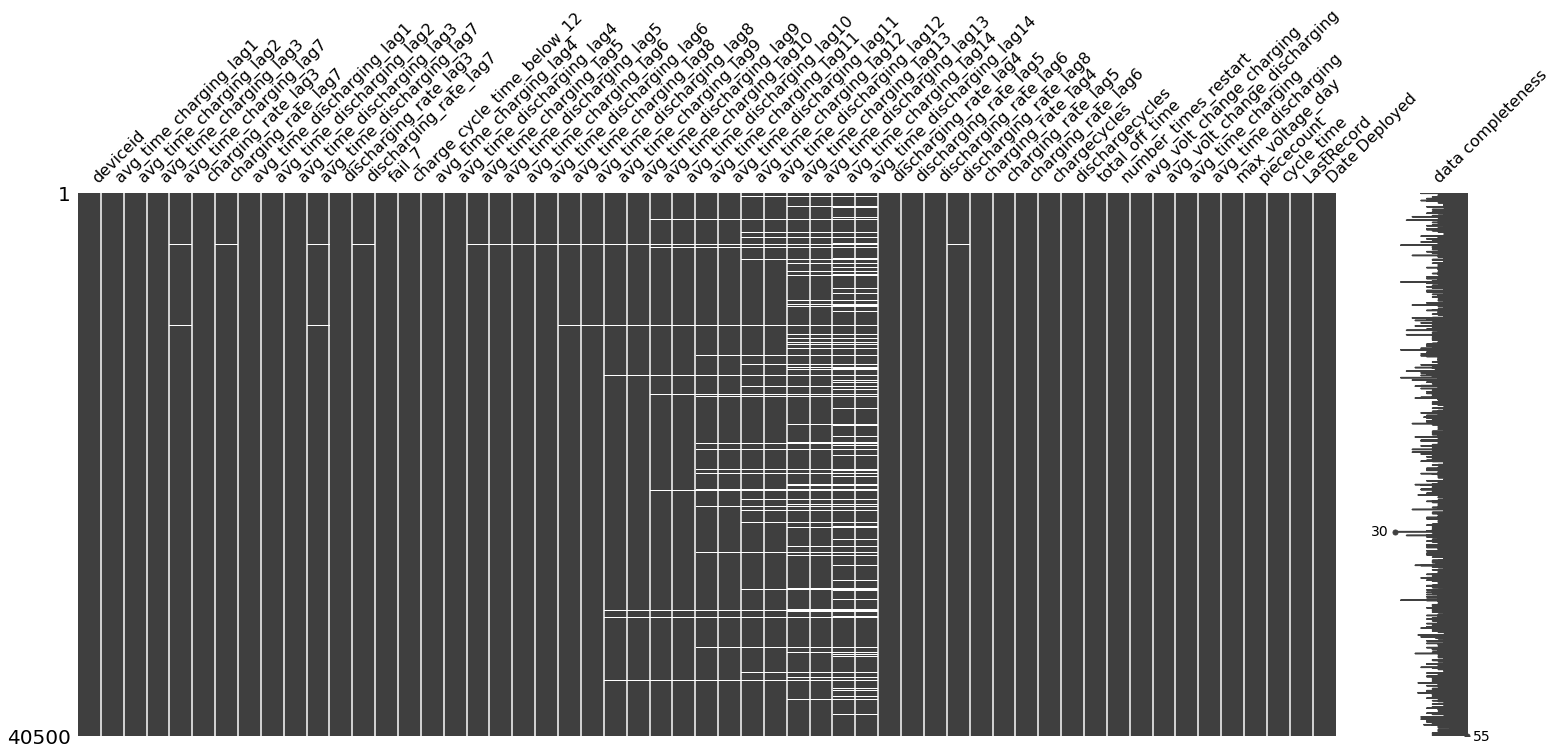

In [9]:
msno.matrix(df_train,labels=True)
plt.show()

In [10]:
# there are thousands of missing values in some columns, removing so many records will lead to lose of data,
# We chose to replace the values with 0

In [8]:
# training set
df_train.fillna(0,inplace=True)

# test set
df_test.fillna(0,inplace=True)

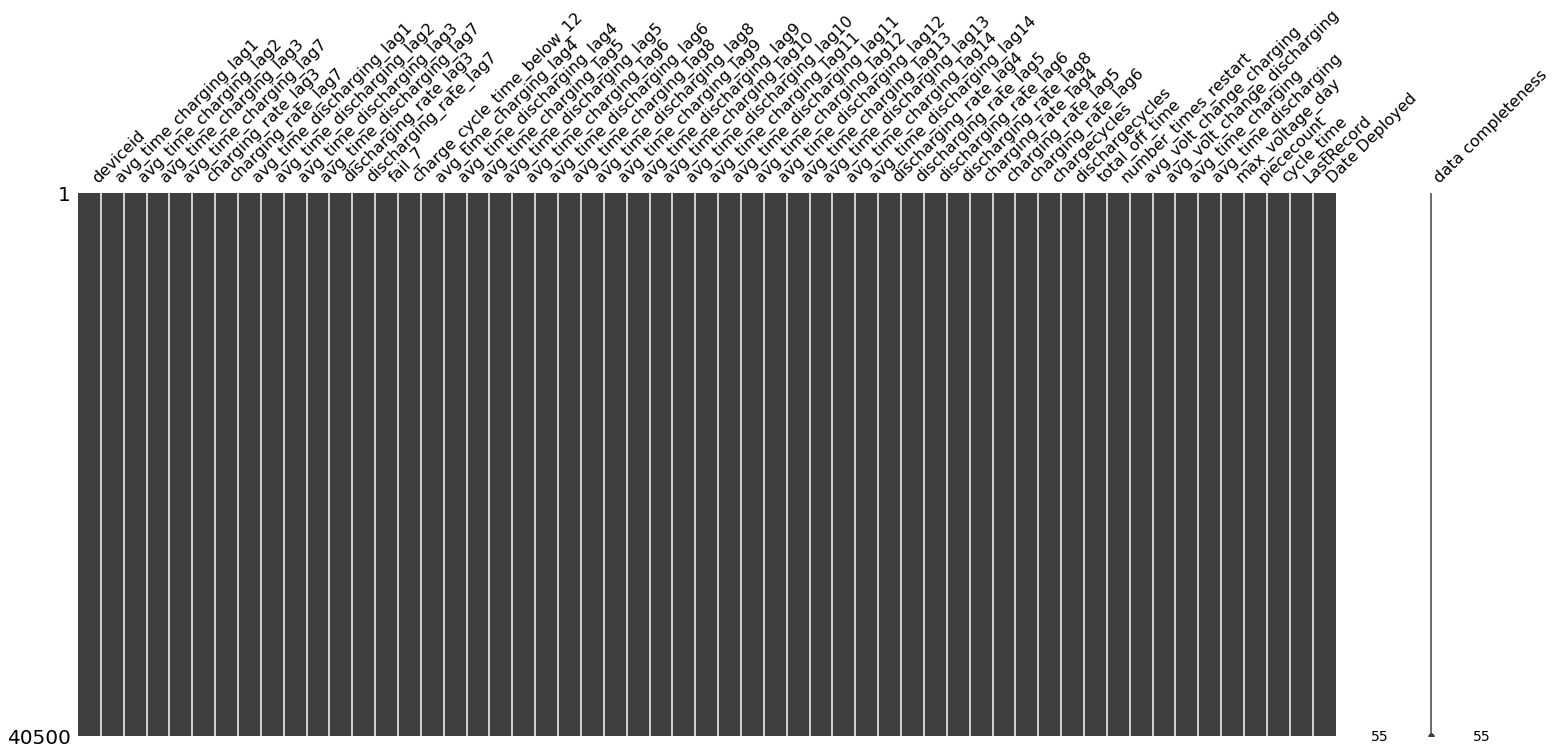

In [12]:
msno.matrix(df_train,labels=True)
plt.show()

In [9]:
#checking number of rows and columns after removing the NA values
df_train.shape

(40500, 55)

# Exploratory data analysis

In [10]:
df_train["fail_7"].value_counts(normalize=True)*100

import plotly.graph_objects as go
fig = go.Figure()
labels=["Fail","Pass"]
fig.add_trace(go.Pie(labels=labels, values=df_train['fail_7'].value_counts()))
fig.update_layout(autosize=False, width=400, height=350)
fig.show()

# 23% of the time meters failed in past as per training data set 

### Time Series Analysis of lagged variable - avg_time_charging

In [21]:
#R Code used to generate 'ts_avg_charge5.csv'
'''
library(tidyverse)
library(dplyr)
library(stringr)

#manually import 'train.csv' file

#select subset of data
train %>% select(`Date Deployed`, LastRecord, days_in_use, lifetime_pcs)

train_fail <- train %>% filter(fail_7==1)

df_avg_charge <- train_fail %>% select(deviceid, lifetime_pcs, avg_time_charging_lag1, avg_time_charging_lag10, 
                                       avg_time_charging_lag11, avg_time_charging_lag12, avg_time_charging_lag13, 
                                       avg_time_charging_lag14, avg_time_charging_lag2, avg_time_charging_lag3, 
                                       avg_time_charging_lag4, avg_time_charging_lag5, avg_time_charging_lag6, 
                                       avg_time_charging_lag7, avg_time_charging_lag8, avg_time_charging_lag9)

#converts from wide to long format for TS
df_avg_charge2 <- df_avg_charge %>% gather(key=lag_in_days, value=avg_time_charging, avg_time_charging_lag1, avg_time_charging_lag10, 
                         avg_time_charging_lag11, avg_time_charging_lag12, avg_time_charging_lag13, 
                         avg_time_charging_lag14, avg_time_charging_lag2, avg_time_charging_lag3, 
                         avg_time_charging_lag4, avg_time_charging_lag5, avg_time_charging_lag6, 
                         avg_time_charging_lag7, avg_time_charging_lag8, avg_time_charging_lag9)

# for row in df, replace value with extracted number
df_avg_charge3 <- df_avg_charge2 %>% mutate(lag_in_days=as.numeric(gsub(".*?([0-9]+).*", "\\1", lag_in_days)))

# bin the lifetimepcs var  to create groups
df_avg_charge4 <- df_avg_charge3 %>% mutate(pcs_grp=cut(lifetime_pcs, breaks=c(-Inf, 50000, 100000, Inf), labels=c("<50k","50k-100k","100k<")))

#convert lag #s to dates
df_avg_charge5 <- df_avg_charge4 %>% mutate(lag_date = case_when(df_avg_charge5$lag_in_days == 1 ~ '03/31/2021',
                                                                 df_avg_charge5$lag_in_days == 2 ~ '03/30/2021',
                                                                 df_avg_charge5$lag_in_days == 3 ~ '03/29/2021',
                                                                 df_avg_charge5$lag_in_days == 4 ~ '03/28/2021',
                                                                 df_avg_charge5$lag_in_days == 5 ~ '03/27/2021',
                                                                 df_avg_charge5$lag_in_days == 6 ~ '03/26/2021',
                                                                 df_avg_charge5$lag_in_days == 7 ~ '03/25/2021',
                                                                 df_avg_charge5$lag_in_days == 8 ~ '03/24/2021',
                                                                 df_avg_charge5$lag_in_days == 9 ~ '03/23/2021',
                                                                 df_avg_charge5$lag_in_days == 10 ~ '03/22/2021',
                                                                 df_avg_charge5$lag_in_days == 11 ~ '03/21/2021',
                                                                 df_avg_charge5$lag_in_days == 12 ~ '03/20/2021',
                                                                 df_avg_charge5$lag_in_days == 13 ~ '03/19/2021',
                                                                 df_avg_charge5$lag_in_days == 14 ~ '03/18/2021',
                                                                 TRUE ~ '0'))
#export df for TS
write.csv(df_avg_charge5, "\ts_avg_charge5.csv", row.names = FALSE)
'''


'\nlibrary(tidyverse)\nlibrary(dplyr)\nlibrary(stringr)\n\n#manually import \'train.csv\' file\n\n#select subset of data\ntrain %>% select(`Date Deployed`, LastRecord, days_in_use, lifetime_pcs)\n\ntrain_fail <- train %>% filter(fail_7==1)\n\ndf_avg_charge <- train_fail %>% select(deviceid, lifetime_pcs, avg_time_charging_lag1, avg_time_charging_lag10, \n                                       avg_time_charging_lag11, avg_time_charging_lag12, avg_time_charging_lag13, \n                                       avg_time_charging_lag14, avg_time_charging_lag2, avg_time_charging_lag3, \n                                       avg_time_charging_lag4, avg_time_charging_lag5, avg_time_charging_lag6, \n                                       avg_time_charging_lag7, avg_time_charging_lag8, avg_time_charging_lag9)\n\n#converts from wide to long format for TS\ndf_avg_charge2 <- df_avg_charge %>% gather(key=lag_in_days, value=avg_time_charging, avg_time_charging_lag1, avg_time_charging_lag10, \n       

In [22]:
import statsmodels.api as sm

In [23]:
#read in output file generated from R script that processed subset of the data into time-series appropriate format
charge5=pd.read_csv('ts_avg_charge5.csv',parse_dates=True)

In [24]:
#select one series (device) to examine
ts1 = charge5.loc[charge5['deviceid'] == 24670]
ts2 = ts1[['lag_date', 'avg_time_charging']]
ts2.set_index("lag_date", inplace=True)

In [25]:
ts2

avg_time_charging
lag_date                     
03/31/2021               5.21
03/22/2021              36.22
03/21/2021              46.88
03/20/2021              14.56
03/19/2021              41.56
03/18/2021               5.63
03/30/2021               4.65
03/29/2021              38.13
03/28/2021               4.95
03/27/2021               6.08
03/26/2021               6.12
03/25/2021               4.93
03/24/2021              26.62
03/23/2021              46.52

D:\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning:

invalid value encountered in sqrt



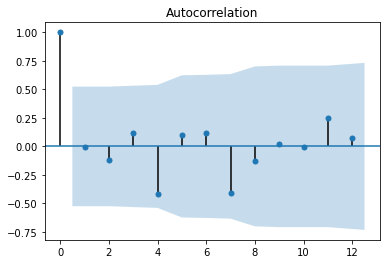

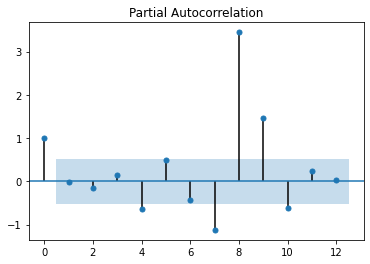

In [26]:
#generate autocorrelation andpartial autocorrelation plots
sm.graphics.tsa.plot_acf(ts2.values.squeeze())
sm.graphics.tsa.plot_pacf(ts2.values.squeeze())
plt.show()

## Insight:
#### The Partial Autocorrelation plot shows that lags 7, 8 ,9 are significant for the device 24670 for the avg_time_charging variables.

# Data preprocessing

In [15]:
# for training set
df_train["LastRecord"]=pd.to_datetime(df_train["LastRecord"])
df_train["Date Deployed"]=pd.to_datetime(df_train["Date Deployed"])

# For test set
df_test["LastRecord"]=pd.to_datetime(df_test["LastRecord"])
df_test["Date Deployed"]=pd.to_datetime(df_test["Date Deployed"])

deviceid  avg_time_charging_lag1  \
deviceid                     1.000000                0.004142   
avg_time_charging_lag1       0.004142                1.000000   
avg_time_charging_lag2      -0.001142                0.001707   
avg_time_charging_lag3       0.002691                0.001525   
avg_time_charging_lag7       0.003646               -0.005326   
charging_rate_lag3          -0.004674                0.011670   
charging_rate_lag7          -0.001515               -0.003465   
avg_time_discharging_lag1    0.004854                0.979988   
avg_time_discharging_lag2   -0.000761                0.001834   
avg_time_discharging_lag3    0.002166                0.001580   
avg_time_discharging_lag7    0.004865               -0.005303   
discharging_rate_lag3       -0.007265                0.009126   
discharging_rate_lag7        0.002640               -0.001635   
fail_7                      -0.004251               -0.014580   
charge_cycle_time_below_12   0.000475               -0.004235   
avg_time_charging_lag4      -0.004359                0.000620   
avg_time_discharging_lag4   -0.002377                0.001160   
avg_time_charging_lag5      -0.004583               -0.005392   
avg_time_discharging_lag5   -0.004502               -0.005926   
avg_time_charging_lag6      -0.000858               -0.006712   
avg_time_discharging_lag6   -0.001229               -0.006814   
avg_time_charging_lag8       0.001548               -0.001980   
avg_time_discharging_lag8    0.000336               -0.002008   
avg_time_charging_lag9       0.002914               -0.000662   
avg_time_discharging_lag9    0.004090               -0.002018   
avg_time_charging_lag10     -0.003350                0.001675   
avg_time_discharging_lag10  -0.002850                0.002180   
avg_time_charging_lag11     -0.004717               -0.004352   
avg_time_discharging_lag11  -0.002949               -0.004643   
avg_time_charging_lag12      0.005142               -0.008283   
avg_time_discharging_lag12   0.003907               -0.006783   
avg_time_charging_lag13     -0.005919               -0.010076   
avg_time_discharging_lag13  -0.004900               -0.008146   
avg_time_charging_lag14      0.001704                0.001435   
avg_time_discharging_lag14  -0.000308                0.002275   
discharging_rate_lag4        0.007709               -0.051579   
discharging_rate_lag5        0.002769               -0.001434   
discharging_rate_lag6       -0.004403               -0.002994   
discharging_rate_lag8       -0.007260                0.002866   
charging_rate_lag4          -0.000034                0.057934   
charging_rate_lag5           0.003283               -0.006162   
charging_rate_lag6          -0.002332                0.000512   
chargecycles                 0.000911               -0.192945   
dischargecycles              0.000777               -0.192962   
total_off_time               0.009035               -0.010313   
number_times_restart        -0.002188               -0.022071   
avg_volt_change_charging     0.001162               -0.067691   
avg_volt_change_discharging -0.000333               -0.080069   
avg_time_charging            0.000704                0.241628   
avg_time_discharging         0.001197                0.235666   
max_voltage_day              0.000564               -0.086113   
piececount                  -0.002132               -0.001742   
cycle_time                   0.001033                0.238768   

                             avg_time_charging_lag2  avg_time_charging_lag3  \
deviceid                                  -0.001142                0.002691   
avg_time_charging_lag1                     0.001707                0.001525   
avg_time_charging_lag2                     1.000000               -0.010682   
avg_time_charging_lag3                    -0.010682                1.000000   
avg_time_charging_lag7                    -0.000328               -0.005691   
charging_rate_lag3                        -0

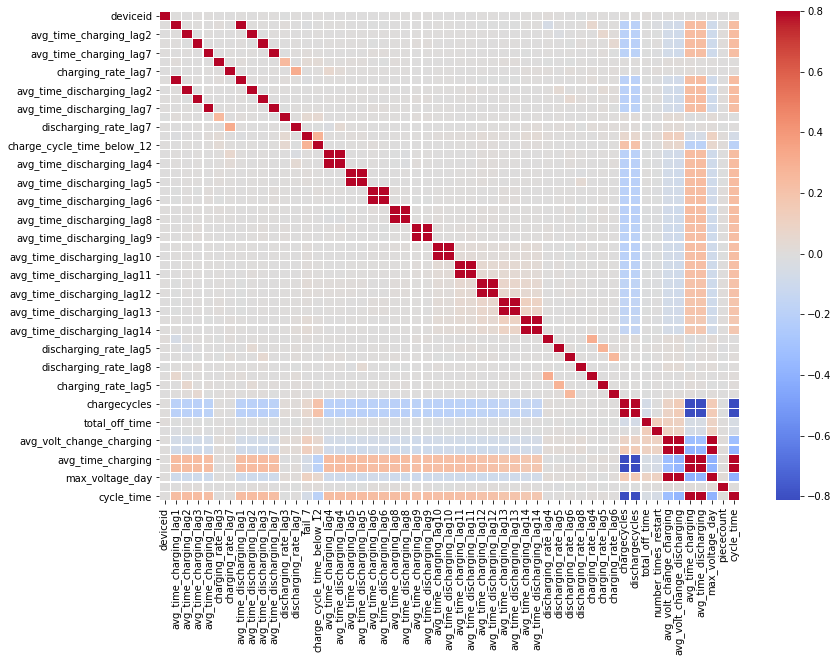

In [16]:
# Correlation matrix

corr_matrix=df_train.corr()
display(corr_matrix)

plt.figure(figsize=(13,9))
sns.heatmap(df_train.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

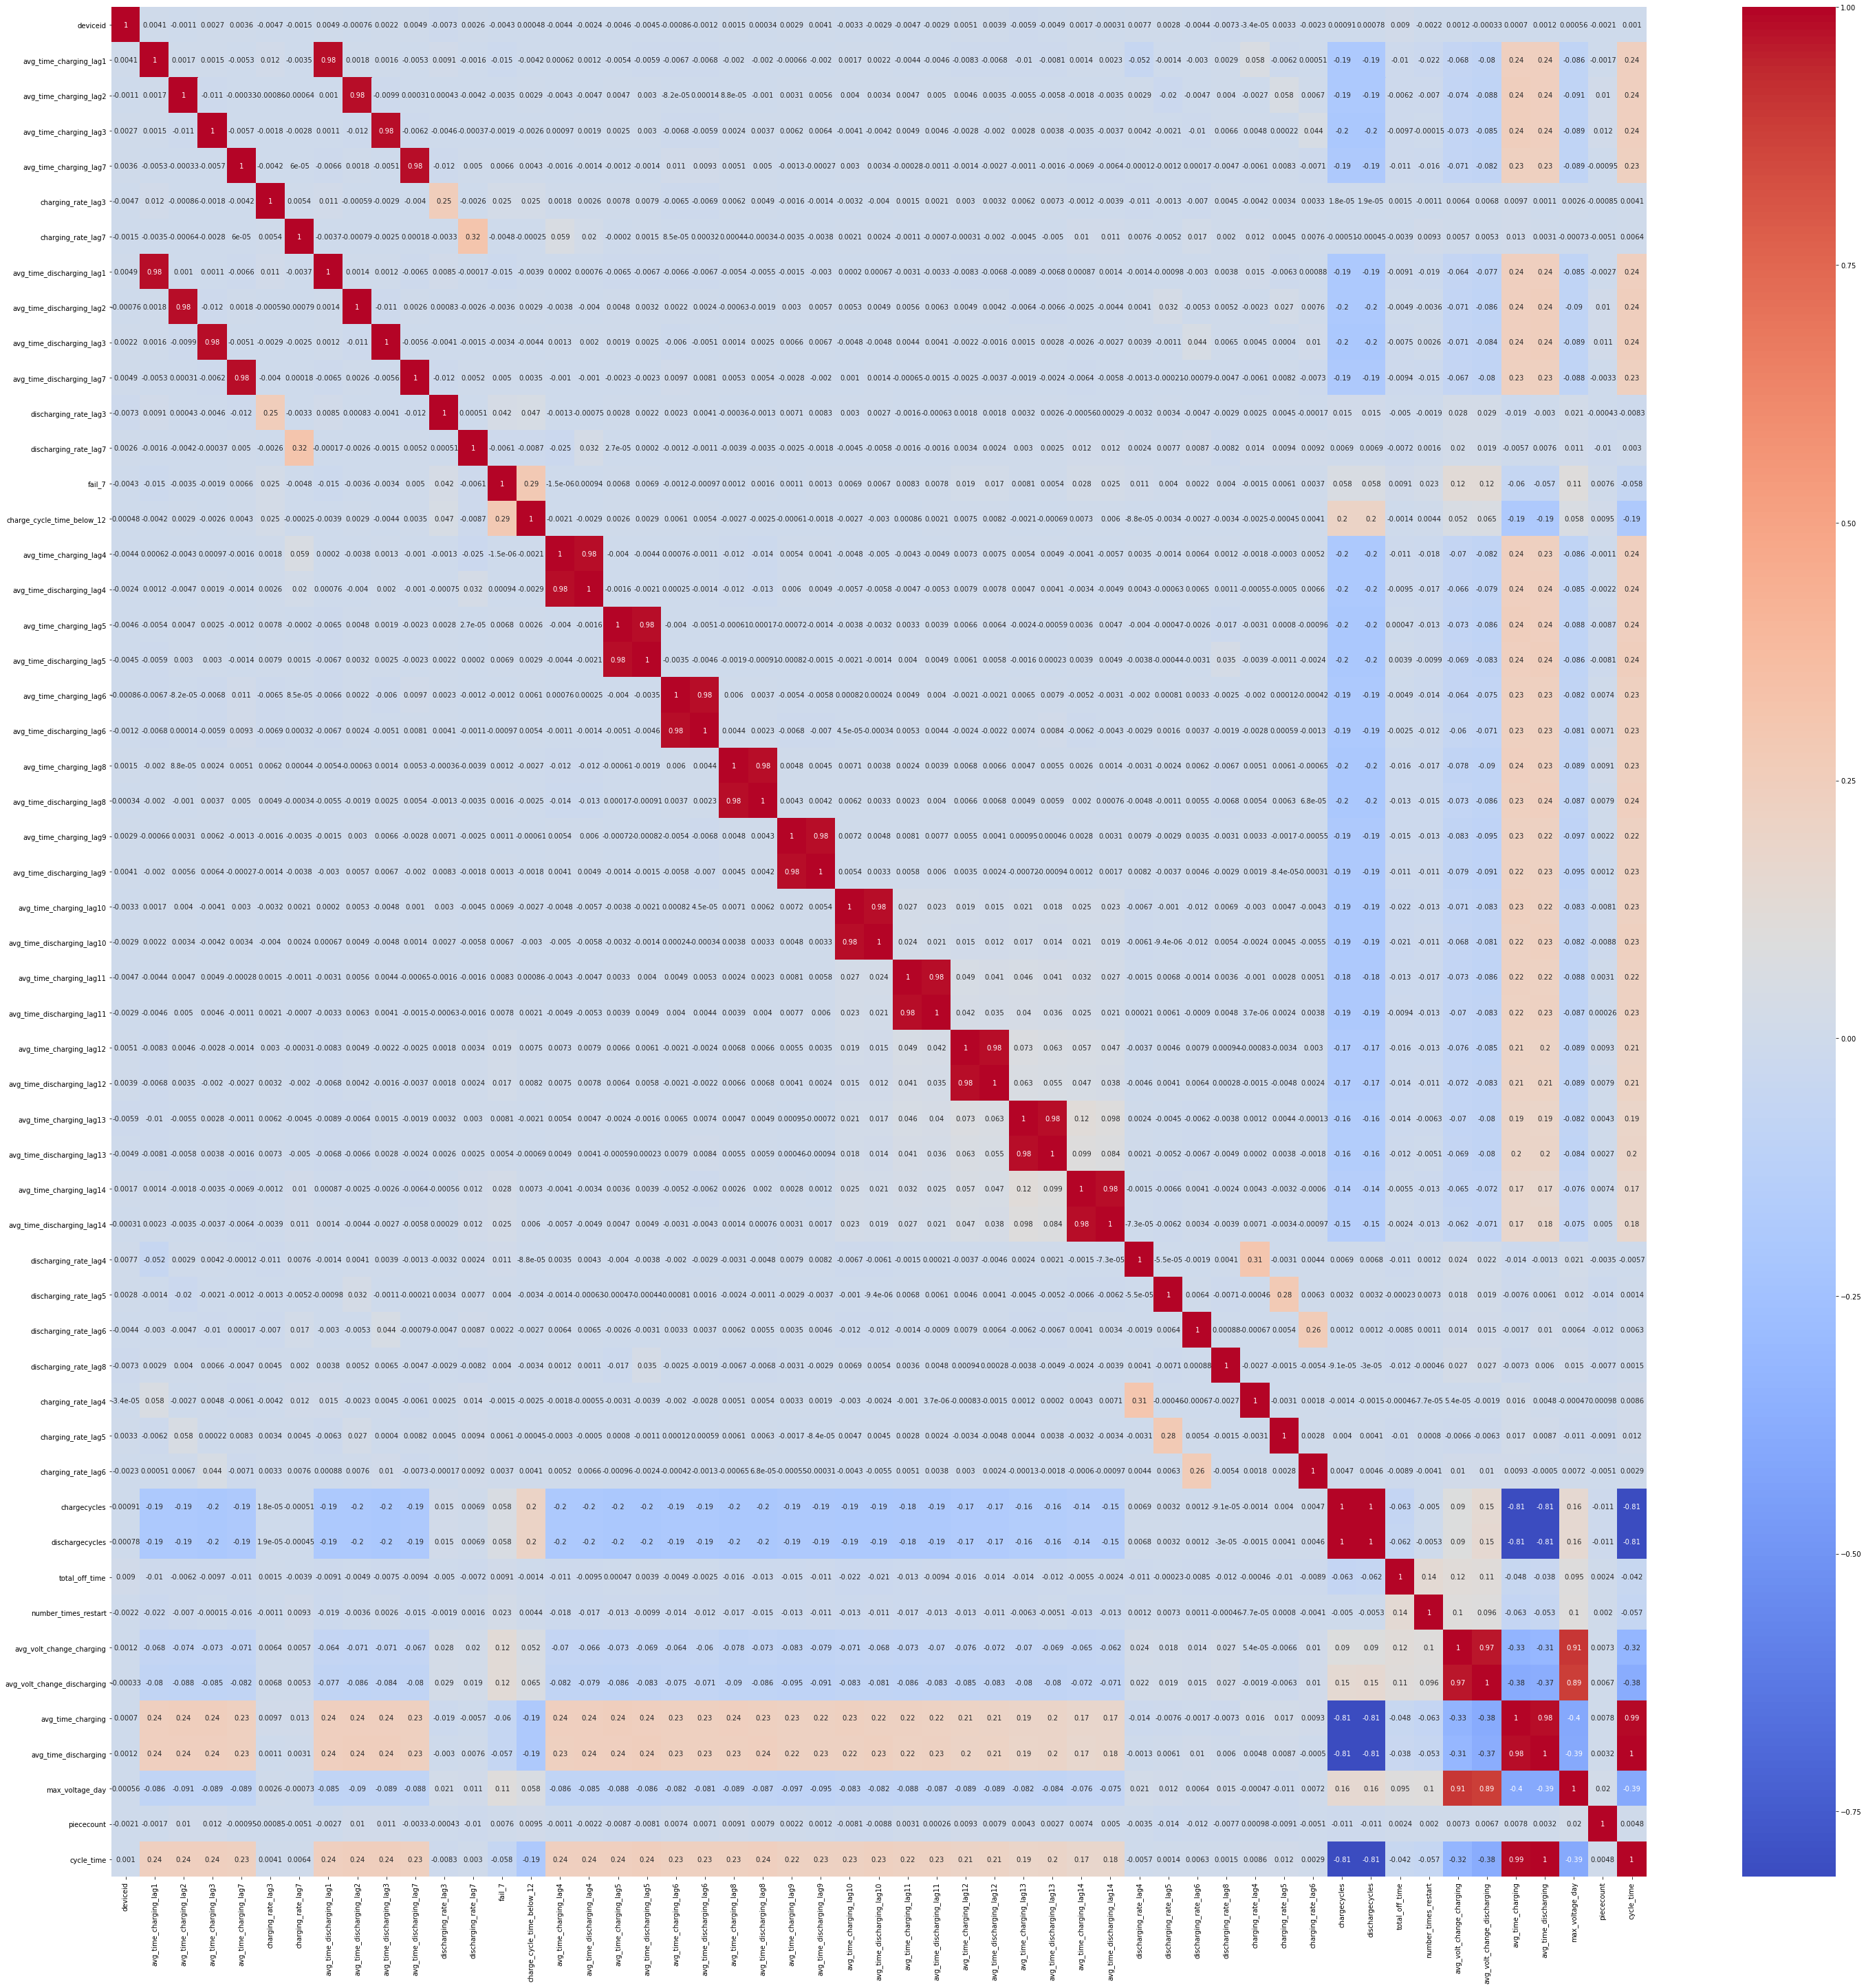

In [18]:
data_corr = df_train.corr()
plt.figure(figsize=(50,50))
sns.heatmap(data_corr, 
        xticklabels=data_corr.columns,
        yticklabels=data_corr.columns,
        cmap='coolwarm',
        annot=True)

# Feature Engineering

In [27]:
# Age of the meters = LastRecord - Date Deployed

df_train["Age"]=df_train["LastRecord"]-df_train["Date Deployed"]
df_train["Age"] = df_train["Age"].dt.days.astype('int16')
df_train.head()

deviceid  avg_time_charging_lag1  avg_time_charging_lag2  \
0     28647                    5.12                   41.11   
1     36175                   36.60                    5.16   
2     16107                    5.51                    5.04   
3     27362                    4.66                   39.85   
4     19463                    5.10                   43.24   

   avg_time_charging_lag3  avg_time_charging_lag7  charging_rate_lag3  \
0                    6.56                   25.39            0.086667   
1                    6.23                    6.96            0.136667   
2                    4.52                    5.96           -0.460000   
3                   35.76                   40.69            0.076667   
4                    4.63                    5.26            0.040000   

   charging_rate_lag7  avg_time_discharging_lag1  avg_time_discharging_lag2  \
0           -0.006667                       4.37                      91.70   
1           -1.296667                      62.67                       6.53   
2           -0.083333                       5.13                       5.65   
3           -0.006667                       3.93                      76.37   
4           -0.153333                       4.69                      71.44   

   avg_time_discharging_lag3  ...  avg_volt_change_charging  \
0                      15.70  ...                377.080000   
1                       6.16  ...                350.517857   
2                       4.14  ...                346.113333   
3                      60.86  ...                356.184211   
4                       3.80  ...                370.904000   

   avg_volt_change_discharging  avg_time_charging  avg_time_discharging  \
0                   367.428750          21.696250             39.005000   
1                   350.309286          19.883571             32.213571   
2                   343.409524          13.675238             20.471429   
3                   349.844737          16.306842             26.189474   
4                   367.730000          18.797333             30.812000   

   max_voltage_day  piececount  cycle_time  LastRecord  Date Deployed  Age  
0      4174.875000   14.200000   60.701250  2021-04-01     2019-10-06  543  
1      4161.000000   19.777778   52.097143  2021-04-01     2019-10-27  522  
2      4152.238095   19.200000   34.146667  2021-04-01     2019-10-31  518  
3      4164.631579   23.625000   42.496316  2021-04-01     2019-10-01  548  
4      4169.800000   12.666667   49.609333  2021-04-01     2019-09-13  566  

[5 rows x 56 columns]

In [28]:
# For test set
df_test["Age"]=df_test["LastRecord"]-df_test["Date Deployed"]
df_test["Age"] = df_test["Age"].dt.days.astype('int16')
#df_test.head()

***Removing following attributes from predictors since they do not seem to provide valuable information to predict failure of meters.***

1) deviceid

2) Date Deployed

3) Last Record


In [29]:
df_train["Age"].dtypes

dtype('int16')

In [30]:
# Training set
X=df_train.drop(columns=["deviceid","fail_7","Date Deployed","LastRecord"])
X=pd.get_dummies(X, drop_first=True)
y=df_train["fail_7"]

# Splitting the dataset into training and validation sets.
X_train, X_valid, y_train, y_valid =train_test_split(X, y, test_size=0.2, random_state=1)

In [31]:
# Test set 
X_test=df_test.drop(columns=["deviceid","Date Deployed","LastRecord"])

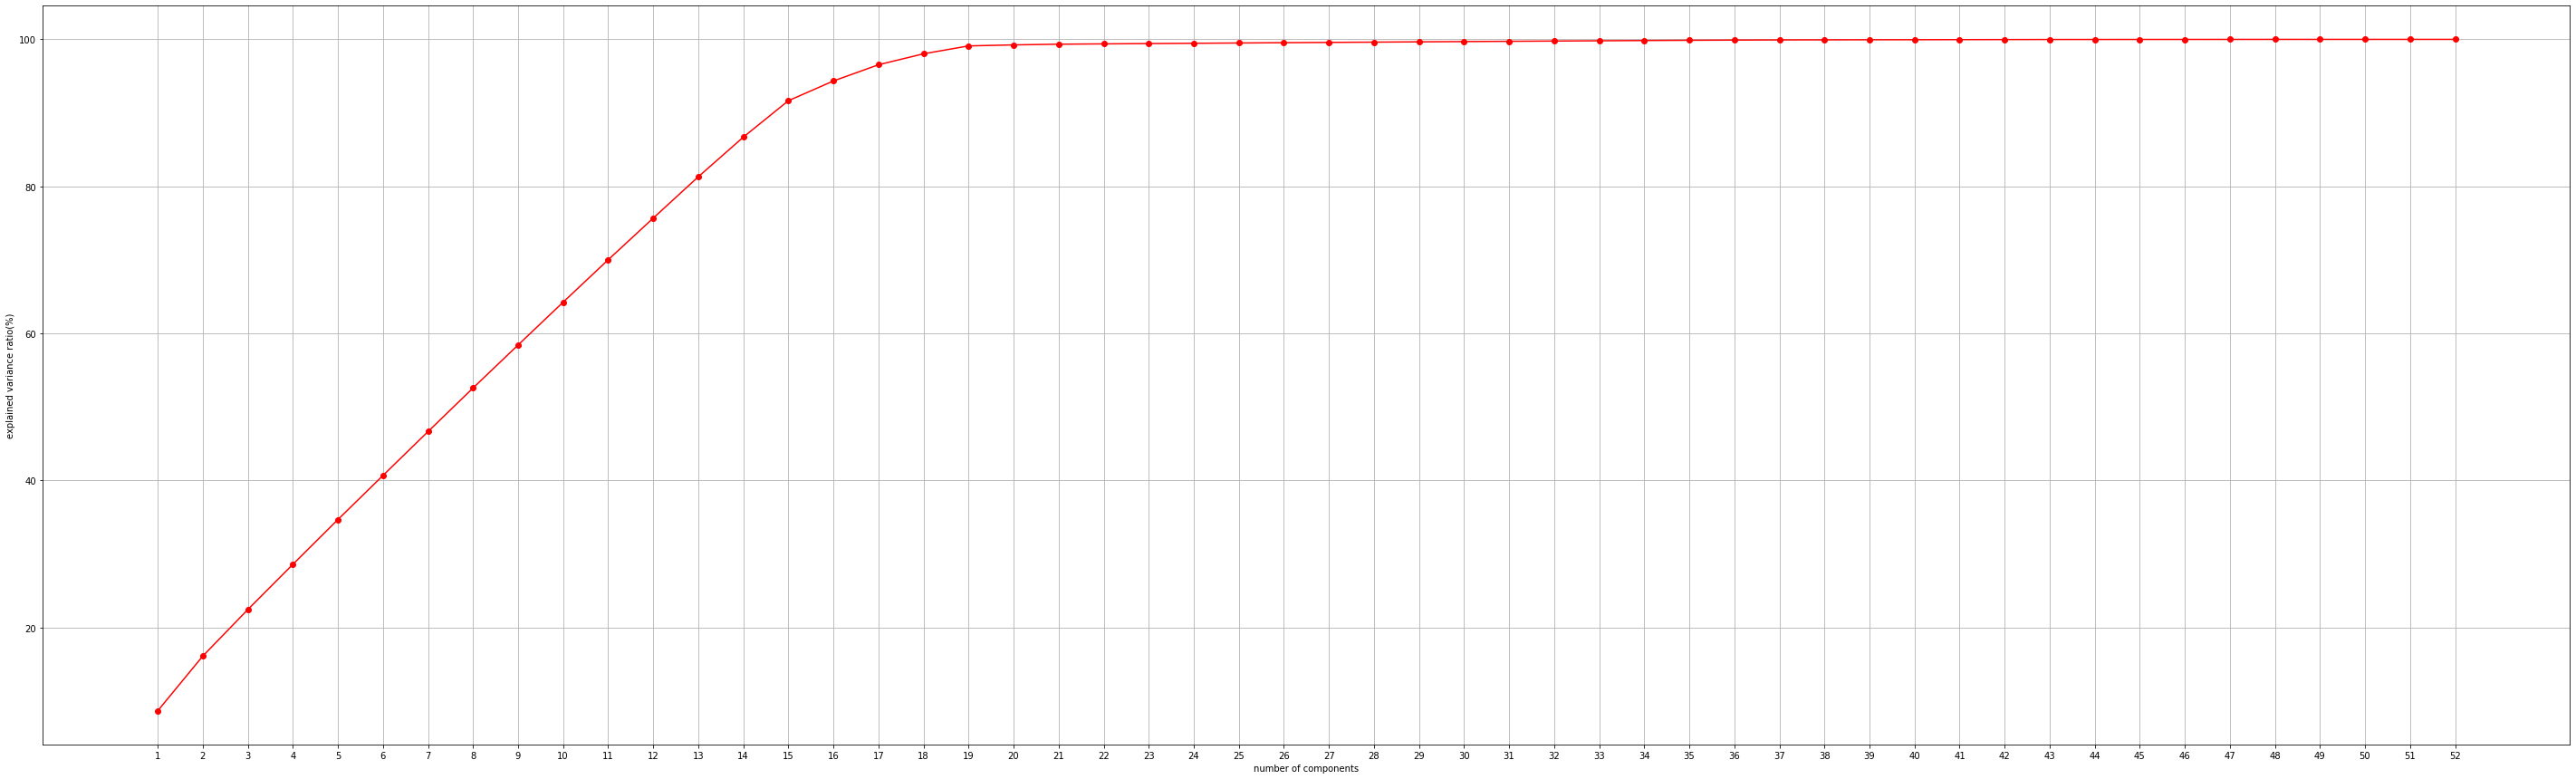

In [32]:
# Checking PCA for Training set
pca = PCA(n_components=None).fit(X_train)

evr = pca.explained_variance_ratio_ * 100

fig, ax = plt.subplots(figsize=(50, 15))
ax.plot(np.arange(1,len(evr)+1),np.cumsum(evr),'-ro')
ax.set_xlabel('number of components')
ax.set_ylabel('explained variance ratio(%)')
ax.set_xticks(np.arange(1,len(evr)+1))
ax.grid()

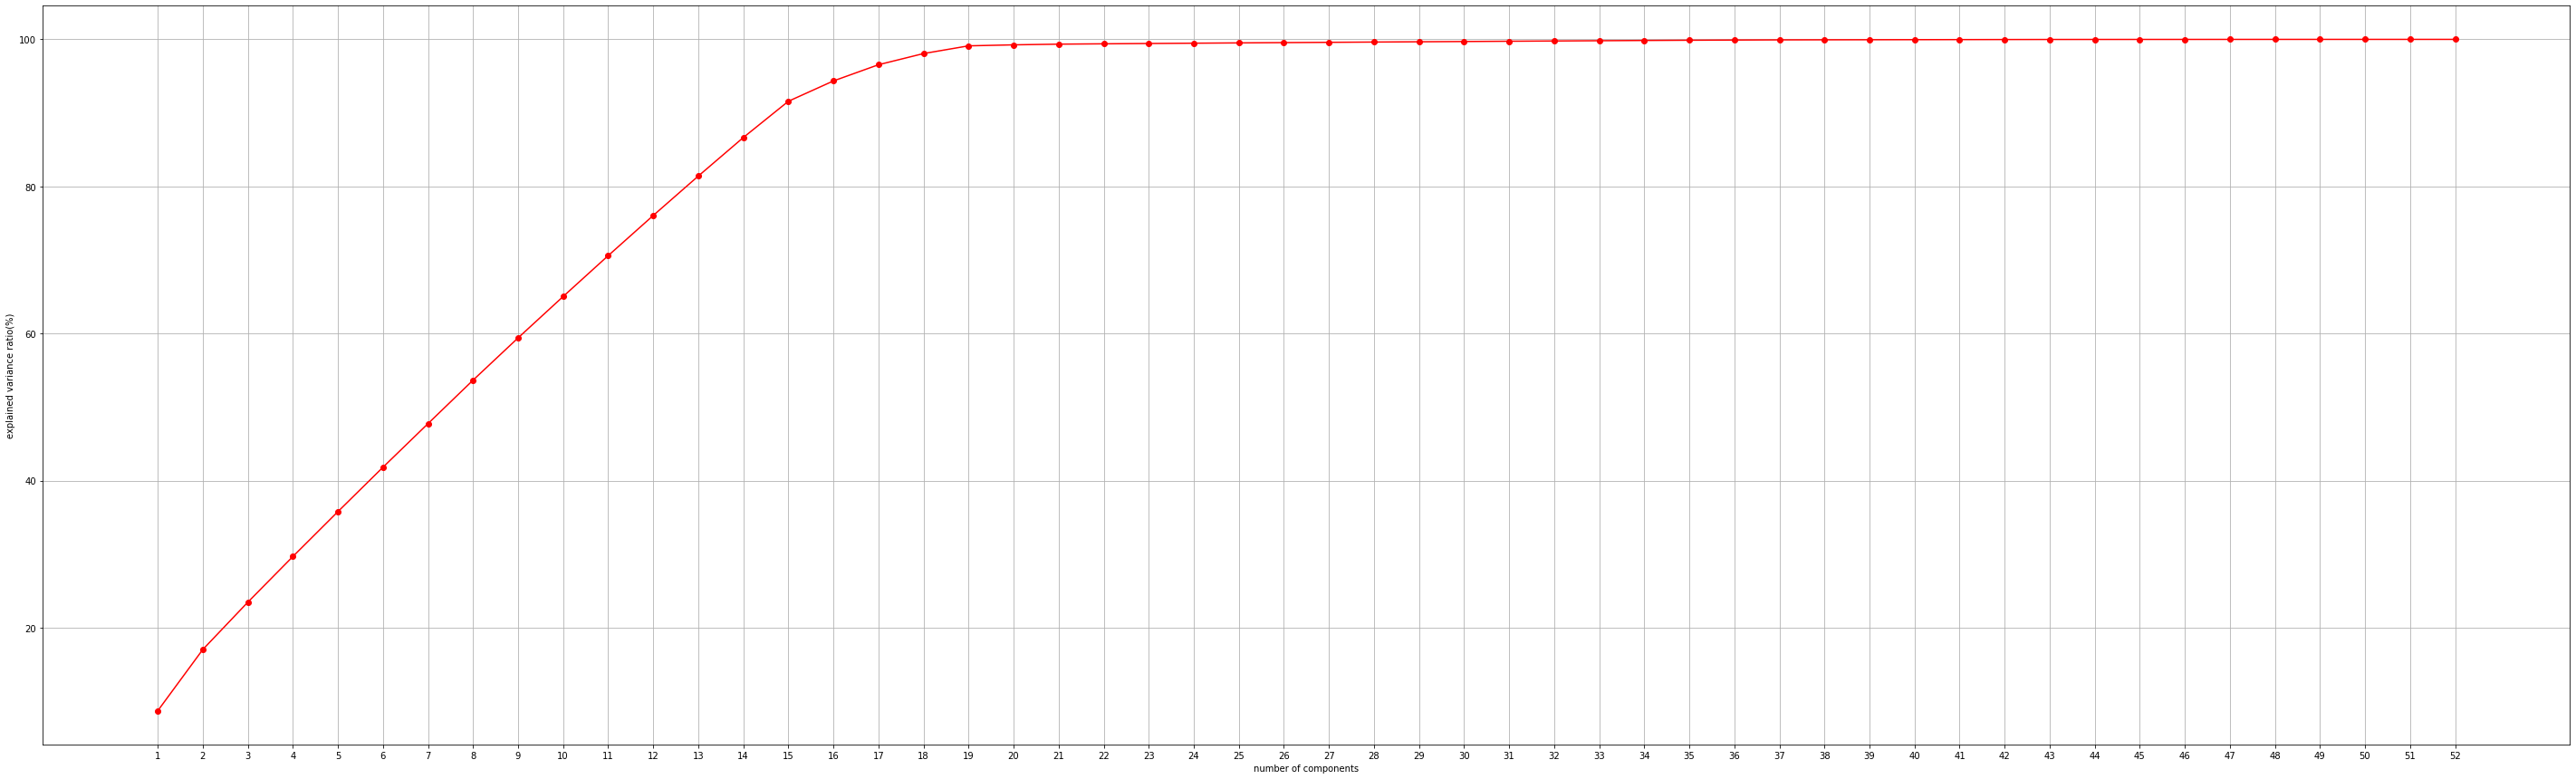

In [33]:
# Checking PCA for Validation Set
pca = PCA(n_components=None).fit(X_valid)

evr = pca.explained_variance_ratio_ * 100

fig, ax = plt.subplots(figsize=(50, 15))
ax.plot(np.arange(1,len(evr)+1),np.cumsum(evr),'-ro')
ax.set_xlabel('number of components')
ax.set_ylabel('explained variance ratio(%)')
ax.set_xticks(np.arange(1,len(evr)+1))
ax.grid()

# Modelling

***1. Decision Tree Classifier***

***2. Logistic Regression***

***3. Naive Bayes***

***4. Random Forest Classifier***

***5. Gradient Boost Classifier***

***6. Adaboost Algorithm***

## 1. Decision Tree 

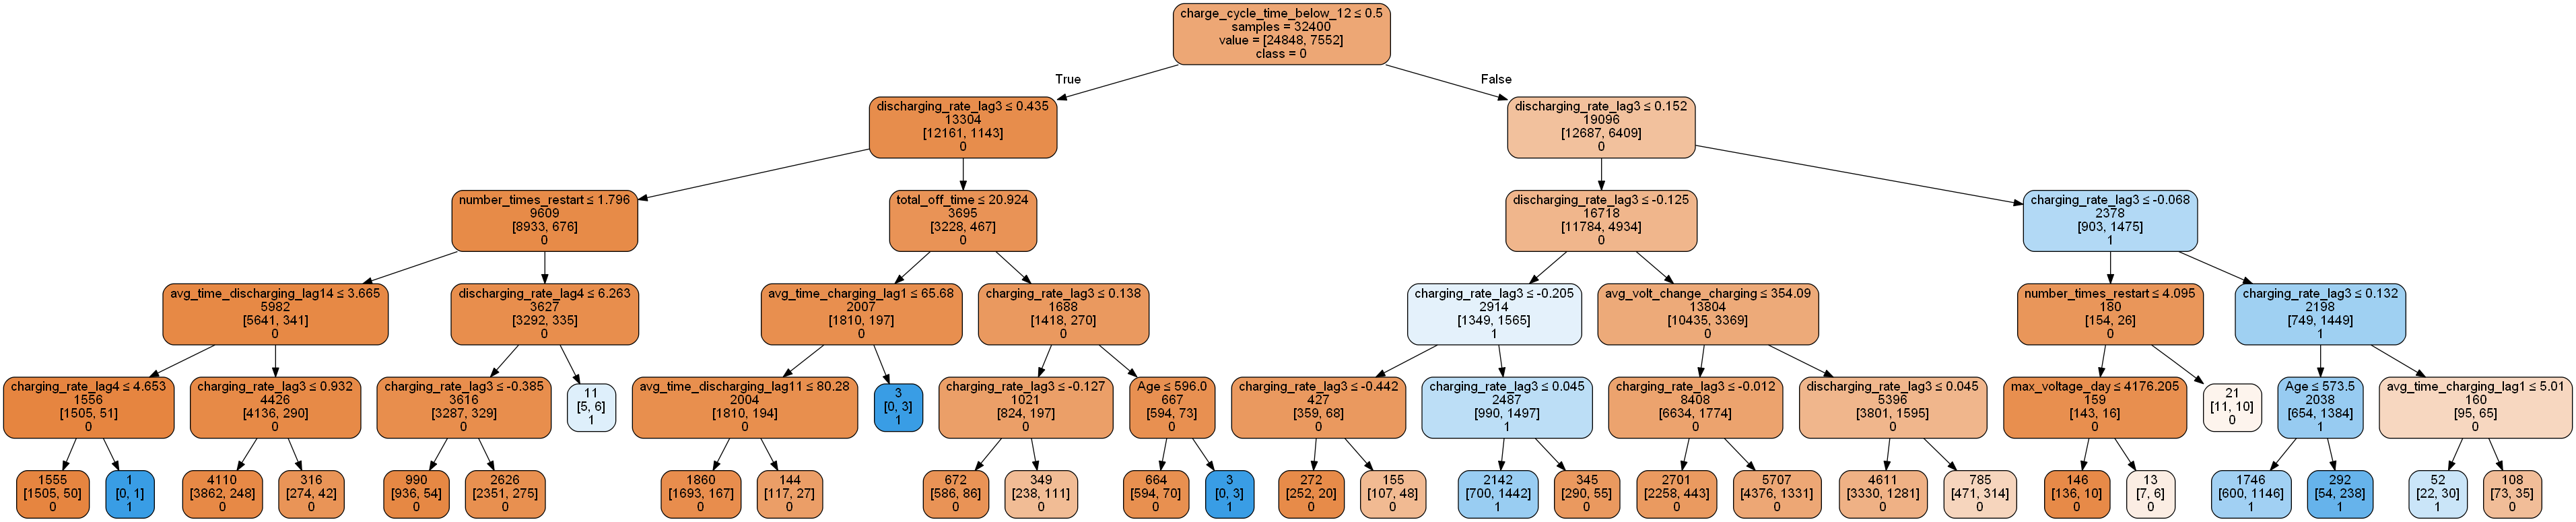

In [53]:
dt=DecisionTreeClassifier(max_depth=5, min_samples_split=50)
dt.fit(X_train,y_train)
plotDecisionTree(dt, feature_names=X_train.columns, class_names=dt.classes_)

In [54]:
# Decision Tree Model Evaluation

# Predictions on training and validation set
prediction_train_dt = dt.predict(X_train)
prediction_valid_dt = dt.predict(X_valid)
print("Accuracy on train is:",round(accuracy_score(y_train,prediction_train_dt),3))
print("Accuracy on test is:",round(accuracy_score(y_valid,prediction_valid_dt),3))

Accuracy on train is: 0.813
Accuracy on test is: 0.815


In [55]:
# Calculating precision, recall and F-measure

p1=precision_score(y_valid,prediction_valid_dt)
r1=recall_score(y_valid,prediction_valid_dt)
f1_1=f1_score(y_valid,prediction_valid_dt)
a1=accuracy_score(y_valid, prediction_valid_dt)

print("Scores for prediction on validation set:")
print("Precision score: ", p1)
print("Recall score: ", r1)
print("f1-score: ", f1_1)
print("Accuracy:",a1)

Scores for prediction on validation set:
Precision score:  0.6654205607476635
Recall score:  0.3850730124391563
f1-score:  0.4878383007879411
Accuracy: 0.8154320987654321


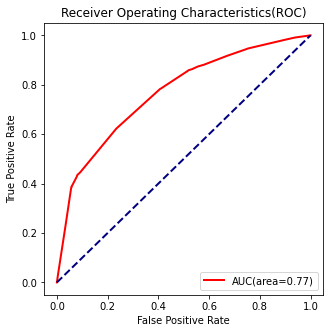

In [56]:
# Plotting ROC curve

from sklearn.metrics import auc, roc_curve

# Creating a function for ROC graph plotting to be used by other models
def roc_graph(clf, validy, validx):
    fpr,tpr,_=roc_curve(validy,clf.predict_proba(validx)[:,1])
    area=auc(fpr,tpr)
    
    plt.figure(figsize=[5,5])
    plt.plot(fpr,tpr, color="red",lw=2, label="AUC(area=%.2f)" % area)
    plt.plot([0,1],[0,1],color="navy",linestyle="--",lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics(ROC)")
    plt.legend(loc="lower right")
    plt.show()
    
# Calling the function with Decision tree classifier inputs
roc_graph(dt, y_valid, X_valid)

                        Feature  Importance
12   charge_cycle_time_below_12    0.400391
10        discharging_rate_lag3    0.364459
4            charging_rate_lag3    0.191419
44     avg_volt_change_charging    0.019264
51                          Age    0.007118
43         number_times_restart    0.004454
0        avg_time_charging_lag1    0.003839
42               total_off_time    0.002867
33        discharging_rate_lag4    0.001855
48              max_voltage_day    0.001510
26   avg_time_discharging_lag11    0.001045
32   avg_time_discharging_lag14    0.001011
37           charging_rate_lag4    0.000767
40                 chargecycles    0.000000
34        discharging_rate_lag5    0.000000
35        discharging_rate_lag6    0.000000
36        discharging_rate_lag8    0.000000
38           charging_rate_lag5    0.000000
39           charging_rate_lag6    0.000000
41              dischargecycles    0.000000
30   avg_time_discharging_lag13    0.000000
3        avg_time_charging_lag7 

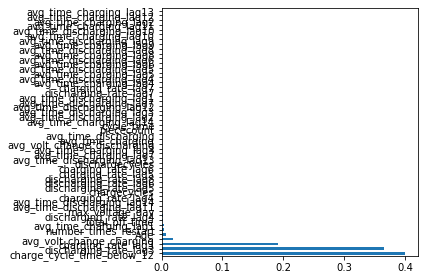

In [59]:
# a) Selecting most important variables/features in Decision Tree algorithm

importances = dt.feature_importances_
plot_df = pd.DataFrame({'Feature': X_train.columns, 
                                'Importance': importances})
plot_df = imp_features_dt.sort_values('Importance', ascending = False)
print(plot_df )

ax=plot_df.plot(kind='barh',x='Feature',legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [60]:
selected_predictors=['charge_cycle_time_below_12','dischargecycles','total_off_time', 'number_times_restart',
            'avg_volt_change_charging', 'avg_volt_change_discharging','avg_time_charging', 'avg_time_discharging', 
            'max_voltage_day','piececount', 'cycle_time','avg_time_charging_lag', 'avg_time_discharging_lag', 
            'discharging_rate_lag',"charging_rate_lag"]


## 2. Logistic Regression

In [61]:
#build the logistic regression model logit_reg
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

logit=LogisticRegression(solver='liblinear')
logit.fit(X_train,y_train)

# Predictions on training and validation set
prediction_train_log = logit.predict(X_train)
prediction_valid_log = logit.predict(X_valid)
print("Accuracy on train is:",accuracy_score(y_train,prediction_train_log))
print("Accuracy on test is:",accuracy_score(y_valid,prediction_valid_log))

Accuracy on train is: 0.7680246913580246
Accuracy on test is: 0.7704938271604939


In [62]:
# Calculating precision, recall and F-measure

p2=precision_score(y_valid,prediction_valid_log)
r2=recall_score(y_valid,prediction_valid_log)
f1_2=f1_score(y_valid,prediction_valid_log)
a2=accuracy_score(y_valid, prediction_valid_log)

print("Scores for prediction on validation set:")
print("Precision score: ", p2)
print("Recall score: ", r2)
print("f1-score: ", f1_2)
print("Accuracy:",a2)

Scores for prediction on validation set:
Precision score:  0.4528301886792453
Recall score:  0.025959978366684695
f1-score:  0.049104859335038366
Accuracy: 0.7704938271604939


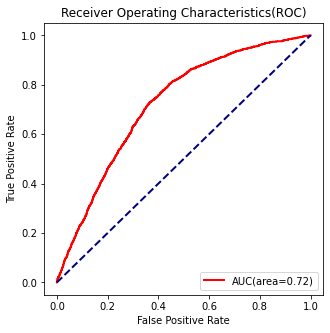

In [63]:
# Calling the function with Logistic regressor inputs
roc_graph(logit, y_valid, X_valid)

## 3. Naive Bayes


In [64]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

# run naive Bayes
nb = GaussianNB()
nb.fit(X_train,y_train)

# predict class membership
prediction_train_nb=nb.predict(X_valid)

# predict probabilities
pred_train_prob_nb = nb.predict_proba(X_valid)

# Prediction accuracy on training and validation set

prediction_train_nb = nb.predict(X_train)
prediction_valid_nb = nb.predict(X_valid)
print("Accuracy on train is:",accuracy_score(y_train,prediction_train_nb))
print("Accuracy on test is:",accuracy_score(y_valid,prediction_valid_nb))

Accuracy on train is: 0.6178395061728396
Accuracy on test is: 0.6209876543209877


In [65]:
# Calculating precision, recall and F-measure on valid

p3=precision_score(y_valid,prediction_valid_nb)
r3=recall_score(y_valid,prediction_valid_nb)
f1_3=f1_score(y_valid,prediction_valid_nb)
a3=accuracy_score(y_valid, prediction_valid_nb)

print("Precision score: ", p3)
print("Recall score: ", r3)
print("f1-score: ", f1_3)
print("Accuracy:",a3)

Precision score:  0.3456384323640961
Recall score:  0.7393185505678745
f1-score:  0.4710544452101999
Accuracy: 0.6209876543209877


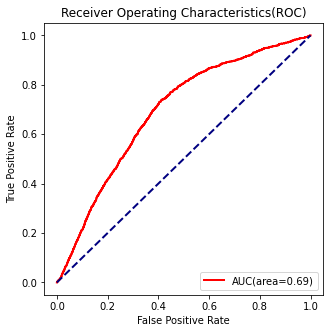

In [66]:
# Calling the function with Naive Bayes inputs
roc_graph(nb, y_valid, X_valid)

## 4. Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion = 'entropy', random_state = 42, n_estimators=500)
rf.fit(X_train,y_train)

prediction_train_rf = rf.predict(X_train)
prediction_valid_rf = rf.predict(X_valid)

# Model evaluation on training set
print("Accuracy with training set:",accuracy_score(y_train, prediction_train_rf))
# Model evaluation on validation set
print("Accuracy with validation set:",accuracy_score(y_valid, prediction_valid_rf))

Accuracy with training set: 1.0
Accuracy with validation set: 0.8062962962962963


In [68]:
# Calculating precision, recall and F-measure on valid

p4=precision_score(y_valid,prediction_valid_rf)
r4=recall_score(y_valid,prediction_valid_rf)
f1_4=f1_score(y_valid,prediction_valid_rf)
a4=accuracy_score(y_valid, prediction_valid_rf)

print("Precision score: ", p4)
print("Recall score: ", r4)
print("f1-score: ", f1_4)
print("Accuracy:",a4)

Precision score:  0.7121212121212122
Recall score:  0.2541914548404543
f1-score:  0.37465125548027106
Accuracy: 0.8062962962962963


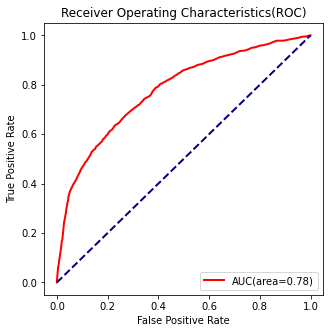

In [69]:
# Calling the function with Random Forest inputs
roc_graph(rf, y_valid, X_valid)

### 5.Gradient Boost Classifier

In [70]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, 
                                 random_state=0)
clf.fit(X_train,y_train)
# Model evaluation on training set
print("Accuracy with training set:",round(accuracy_score(y_train, clf.predict(X_train)),2))
# Model evaluation on validation set
print("Accuracy with validation set:",round(accuracy_score(y_valid, clf.predict(X_valid)),2))

Accuracy with training set: 0.82
Accuracy with validation set: 0.81


In [71]:
# Calculating precision, recall and F-measure on valid

p5=precision_score(y_valid,clf.predict(X_valid))
r5=recall_score(y_valid,clf.predict(X_valid))
f1_5=f1_score(y_valid,clf.predict(X_valid))
a5=accuracy_score(y_valid, clf.predict(X_valid))

print("Precision score: ", p5)
print("Recall score: ", r5)
print("f1-score: ", f1_5)
print("Accuracy:",a5)

Precision score:  0.6629778672032193
Recall score:  0.35640886965927526
f1-score:  0.4635947942314457
Accuracy: 0.8117283950617284


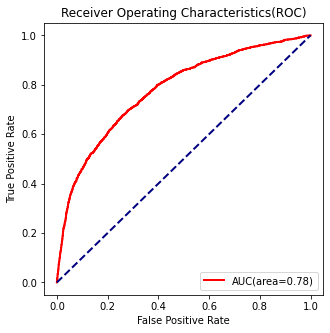

In [72]:
# Calling the function with Gradient Boost inputs
roc_graph(clf, y_valid, X_valid)

### 6. AdaBoost Classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
print("Ensembling Tree R-Squared score: ",str(ada.score(X_valid,y_valid)))

Ensembling Tree R-Squared score:  0.8134567901234568


In [75]:
prediction_train_ada = ada.predict(X_train)
prediction_valid_ada = ada.predict(X_valid)

# Model evaluation on training set
print("Accuracy with training set:",accuracy_score(y_train, prediction_train_ada))
# Model evaluation on validation set
print("Accuracy with validation set:",accuracy_score(y_valid, prediction_valid_ada))

Accuracy with training set: 0.8117283950617284
Accuracy with validation set: 0.8134567901234568


In [76]:
# Calculating precision, recall and F-measure on valid

p6=precision_score(y_valid,prediction_valid_ada)
r6=recall_score(y_valid,prediction_valid_ada)
f1_6=f1_score(y_valid,prediction_valid_ada)
a6=accuracy_score(y_valid, prediction_valid_ada)

print("Precision score: ", p6)
print("Recall score: ", r6)
print("f1-score: ", f1_6)
print("Accuracy:",a6)

Precision score:  0.6794055201698513
Recall score:  0.34613304488912927
f1-score:  0.45861698316015764
Accuracy: 0.8134567901234568


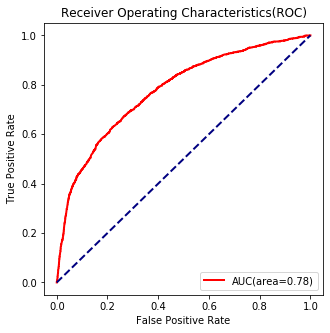

In [40]:
# Calling the function with AdaBooster Classifier inputs
roc_graph(ada, y_valid, X_valid)

### Comparing performance of all models

In [77]:
# Creating lists of all scores for comparison
p=[p1,p2,p3,p4,p5,p6]
r=[r1,r2,r3,r4,r5,r6]
f=[f1_1,f1_2,f1_3,f1_4,f1_5,f1_6]
acc=[a1,a2,a3,a4,a5,a6]
#area=[area1,area2,area3]

# Dataframe for comparison
df_metrics=pd.DataFrame({"Classifier":["Decision Tree Classifier","Logistic Regression","Naive Bayes","Random Forest","Gradient Boost","Adabooster"],"Precision":p,"Recall":r,"F score":f,"Accuracy":acc})
df_metrics

Classifier  Precision    Recall   F score  Accuracy
0  Decision Tree Classifier   0.665421  0.385073  0.487838  0.815432
1       Logistic Regression   0.452830  0.025960  0.049105  0.770494
2               Naive Bayes   0.345638  0.739319  0.471054  0.620988
3             Random Forest   0.712121  0.254191  0.374651  0.806296
4            Gradient Boost   0.662978  0.356409  0.463595  0.811728
5                Adabooster   0.679406  0.346133  0.458617  0.813457

### Based on our observations, Gradient Boost, ADABooster and Decision Tree Classifier is giving better output
#### We chose Decision Tree Classifier because it has highest accuracy, highest recall and highest f-measure, compare to other.

### Final predictions on test set using Decision Tree Classifier model

In [47]:
# Creating a new output column in test dataframe
df_test["fail_7"]=dt.predict(X_test)
df_test["fail_7"].value_counts(normalize=True)*100

# About 13% of the time meters will fail in next 7 days

0    86.933333
1    13.066667
Name: fail_7, dtype: float64

In [48]:
## Prediction and output csv file

df_out=df_test[["deviceid","fail_7"]]
df_out=df_out.set_index("deviceid")

# Creating a csv file
df_out.to_csv("Output_Team_18.csv")
out=pd.read_csv("Output_Team_18.csv")
out

deviceid  fail_7
0        42979       1
1        14911       0
2        48386       0
3        18822       0
4        49810       0
...        ...     ...
4495     23329       0
4496     35263       0
4497     12544       0
4498     44502       1
4499     16821       0

[4500 rows x 2 columns]